[*********************100%%**********************]  1 of 1 completed


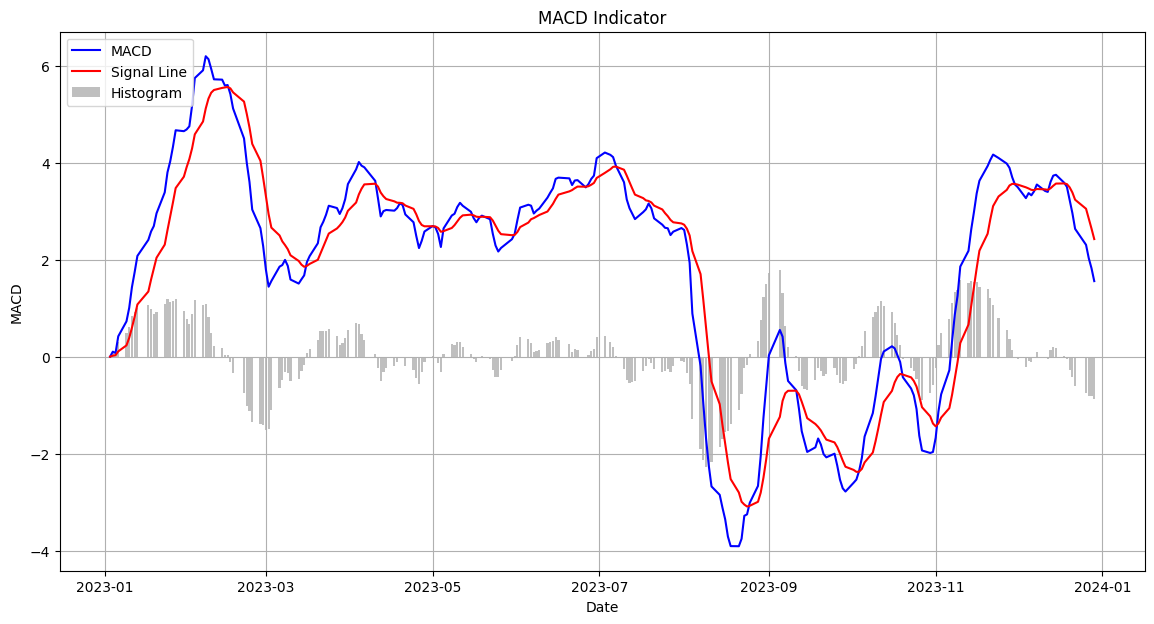

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate the short and long term EMAs
    data['EMA_12'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_26'] = data['Close'].ewm(span=long_window, adjust=False).mean()

    # Calculate the MACD line
    data['MACD'] = data['EMA_12'] - data['EMA_26']

    # Calculate the Signal line
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    # Calculate the Histogram
    data['Histogram'] = data['MACD'] - data['Signal_Line']

    return data

def plot_macd(data):
    plt.figure(figsize=(14,7))

    # Plot the MACD line and Signal line
    plt.plot(data.index, data['MACD'], label='MACD', color='blue')
    plt.plot(data.index, data['Signal_Line'], label='Signal Line', color='red')

    # Plot the Histogram
    plt.bar(data.index, data['Histogram'], label='Histogram', color='gray', alpha=0.5)

    plt.title('MACD Indicator')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

# Example usage
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'

stock_data = get_stock_data(ticker, start_date, end_date)
stock_data_macd = calculate_macd(stock_data)
plot_macd(stock_data_macd)
